In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.shape

(20800, 5)

In [4]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.shape

(18285, 5)

In [7]:
# df=df.drop(['id','text','author'],axis=1)
# df

In [14]:
messages=df.copy()

In [15]:
messages.reset_index(inplace=True)

In [16]:
messages['title'].head()

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                    Why the Truth Might Get You Fired
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
Name: title, dtype: object

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [18]:
import re
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-z]',' ',messages['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [23]:
y=messages['label']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [24]:
cv.get_feature_names()[:10]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut']

In [25]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [32]:
import pandas as pd
df= pd.DataFrame(X_train, columns=cv.get_feature_names())
df

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [36]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

0.8992543496271748


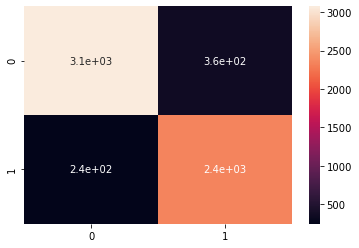

In [40]:
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(accuracy_score(y_test,y_pred))

In [44]:
from sklearn import metrics
import numpy as np
model=MultinomialNB(alpha=0.1)
previous_score=0
for i in np.arange(0,1,0.1):
    sub_model=MultinomialNB(alpha=i)
    sub_model.fit(X_train,y_train)
    y_pred=sub_model.predict(X_test)
    score=metrics.accuracy_score(y_test,y_pred)
    if score>previous_score:
        model=sub_model
    print('Alpha is {} : score is {}'.format(i,score))

C:\Users\Shardul\.conda\envs\ShardulEnv\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha is 0.0 : score is 0.883678541839271
Alpha is 0.1 : score is 0.8951118475559238
Alpha is 0.2 : score is 0.8956089478044739
Alpha is 0.30000000000000004 : score is 0.8971002485501243
Alpha is 0.4 : score is 0.8977630488815245
Alpha is 0.5 : score is 0.8971002485501243
Alpha is 0.6000000000000001 : score is 0.8982601491300746
Alpha is 0.7000000000000001 : score is 0.8985915492957747
Alpha is 0.8 : score is 0.8987572493786247
Alpha is 0.9 : score is 0.8984258492129246


In [45]:
feature_names=cv.get_feature_names()
feature_names

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'achiev',
 'acknowledg',
 'acknowledg emf',
 'acknowledg emf damag',
 'acquit',
 'acquitt',
 'across',
 'act',
 'act like',
 'act new',
 'act new york',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advertis',
 'advic',
 'advis',
 'advis new',
 'advis new york',
 'advisor',
 'advoc',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afford care',
 'afford care act',
 'afghan',
 'afghanistan',
 'afraid',
 'africa',
 'african',
 'african american',
 'aftermath',
 'ag',
 'age',
 'age new',
 'age new york',
 'agenc',
 'agenda',
 'agenda breitbar

In [47]:
model.coef_[0]

array([ -9.10550126,  -8.91978412, -10.05288258, ..., -10.80009698,
        -8.76321506,  -9.33375991])

In [51]:
# most real
sorted(zip(model.coef_[0],feature_names))[:20]

[(-10.800096983087144, 'abroad'),
 (-10.800096983087144, 'abus new'),
 (-10.800096983087144, 'abus new york'),
 (-10.800096983087144, 'act new'),
 (-10.800096983087144, 'act new york'),
 (-10.800096983087144, 'advic'),
 (-10.800096983087144, 'advis new'),
 (-10.800096983087144, 'advis new york'),
 (-10.800096983087144, 'afford care'),
 (-10.800096983087144, 'afford care act'),
 (-10.800096983087144, 'afraid'),
 (-10.800096983087144, 'age new'),
 (-10.800096983087144, 'age new york'),
 (-10.800096983087144, 'agenda breitbart'),
 (-10.800096983087144, 'ahead trump'),
 (-10.800096983087144, 'airlin'),
 (-10.800096983087144, 'aleppo new'),
 (-10.800096983087144, 'aleppo new york'),
 (-10.800096983087144, 'ali'),
 (-10.800096983087144, 'america breitbart')]

In [52]:
sorted(zip(model.coef_[0],feature_names),reverse=True)[:20]

[(-4.004018421329629, 'trump'),
 (-4.274904418995867, 'hillari'),
 (-4.3705567325778345, 'clinton'),
 (-4.8779229708110705, 'elect'),
 (-5.227098356264578, 'new'),
 (-5.257092035660182, 'comment'),
 (-5.265829531177679, 'video'),
 (-5.34810524060273, 'hillari clinton'),
 (-5.367345853395573, 'war'),
 (-5.3820232205975485, 'us'),
 (-5.396919225922963, 'fbi'),
 (-5.4641627529678, 'vote'),
 (-5.485796912032497, 'email'),
 (-5.530522085404761, 'obama'),
 (-5.626461393886647, 'world'),
 (-5.718692618102681, 'russia'),
 (-5.732591382493496, 'donald'),
 (-5.775485735134914, 'donald trump'),
 (-5.835699557484175, 'break'),
 (-5.899772709808571, 'presid')]